In [1]:
# This notebook is all about really crunnching when we have an image what we would 'like' to be
# called calibrated and not. Basically, what averages will we be happy with, and which will we not.
from ese.experiment.metrics.calibration.pixelwise import ECE
import torch
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ground Truth')

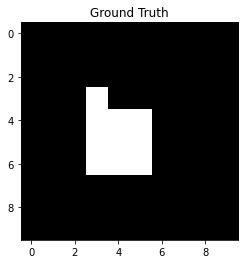

In [10]:
# let's make the ground truth, which is a 10x10 tensor with a white square in the middle
# we will slice off the right side of the square to make our contradiction.
ground_truth = torch.zeros(10, 10)
ground_truth[3:7, 3:7] = 1
ground_truth[3:7, 6] = 0
ground_truth[3, 4:7] = 0

plt.imshow(ground_truth, cmap='gray')  
plt.title('Ground Truth')

## Example 1: Bad half-boundary.

Text(0.5, 1.0, 'Confidence Map')

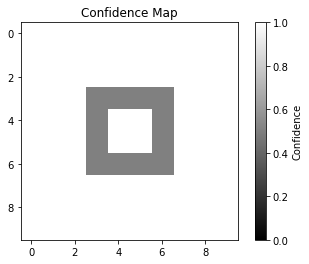

In [9]:
# Let's now make some predictions that we want to break the ECE metric.
# The way we do this is by making predictions in the same bin have wildly different accuracies.
# First we make a confidence map where the boundary of the square is 0.6 and the middle is 0.1
# and the rest if 0
chann_conf_map = torch.zeros((2, 10, 10))
# Set the background to be 1 everywhere outside of the square
chann_conf_map[0, :, :] = 1.0
chann_conf_map[0, 3:7, 3:7] = 0.0
# Set the square to be 0.5 at the boundaries and 1 in the middle.
chann_conf_map[1, 3:7, 3:7] = 0.5
chann_conf_map[1, 4:6, 4:6] = 1.0
# Get the argmax
conf_map = torch.max(chann_conf_map, dim=0).values

plt.imshow(conf_map, vmin=0, vmax=1, cmap='gray')
plt.colorbar(label="Confidence")
plt.title("Confidence Map")

Text(0.5, 1.0, 'Prediction Map')

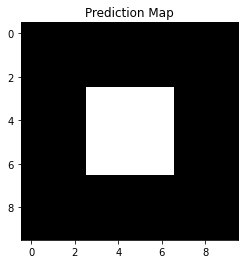

In [11]:
# Now we adversarily make our pred predict exactly half of the 0.5 area correctly (the top left) and the other half incorrectly (the bottom right).
pred_map = torch.argmax(chann_conf_map, dim=0)

plt.imshow(pred_map, cmap='gray')
plt.title("Prediction Map")

In [5]:
# Paradoxically, this will have an ECE of 0!
cal_err = ECE(
    num_bins=10,
    pred_map=pred_map,
    conf_map=conf_map,
    label_map=ground_truth
)["cal_score"]
print("ECE: ", cal_err)

ECE:  0.0


## Example 2: More extreme version of 1. 

(-0.5, 9.5, 9.5, -0.5)

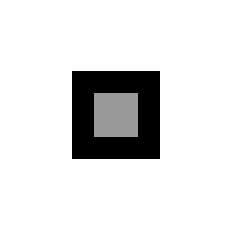

In [6]:
# Let's now make some predictions that we want to break the ECE metric.
# The way we do this is by making predictions in the same bin have wildly different accuracies.
# First we make a confidence map where the boundary of the square is 0.6 and the middle is 0.1
# and the rest if 0
conf_map2 = torch.ones(10, 10)
conf_map2[3:7, 3:7] = 0.5
conf_map2[4:6, 4:6] = 0.8

plt.imshow(conf_map2, cmap='gray')
plt.axis('off')